In [68]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


def main():

    maze = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    maze1 = [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            ]


    start = (1, 2)
    end = (9, 2)
    start1 = (2, 5)
    end1 = (18, 10)
    path = astar(maze, start, end)
    print(path)
    return path

if __name__ == '__main__':
    path=main()
    

[(1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)]


In [10]:
####__________Solving for x(t)__________####

Ax=np.array([[0,0,1],[1,1,1],[0,1,0]])
# print(Ax.shape)
Bx=np.array([3,1,0]).reshape(3,1)
Wx=np.linalg.solve(Ax,Bx)
print(Wx)
####__________Solving for y(t)__________####

Ay=np.array([[0,0,0,0,1],[1,1,1,1,1],[625,125,25,5,1],[0,0,0,1,0],[500,75,10,1,0]])
# print(Ay.shape)
By=np.array([0,2,0]).reshape(3,1)
Wy=np.linalg.solve(Ax,By)
print(Wy)

Anx=np.array([[0,0,1],[1,1,1],[2,1,1]])
# print(Ax.shape)
Bnx=np.array([9,9,0]).reshape(3,1)
Wnx=np.linalg.solve(Anx,Bnx)
print(Wnx)

Bny=np.array([2,5,0]).reshape(3,1)
Wny=np.linalg.solve(Anx,Bny)
print(Wny)


[[-2.]
 [ 0.]
 [ 3.]]
[[2.]
 [0.]
 [0.]]
[[-9.]
 [ 9.]
 [ 9.]]
[[-5.]
 [ 8.]
 [ 2.]]


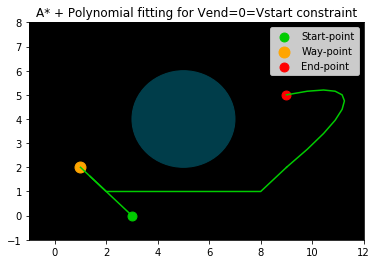

In [17]:
import matplotlib.pyplot as plt
import numpy as np
xt=[]
yt=[]
xnt=[]
ynt=[]
t=np.linspace(0,5,0.1)
for instant in range(0,51,1):
    xt.append(Wx[0,0]*((instant/10)**2)+Wx[1,0]*((instant/10)**1)+Wx[2,0]*((instant/10)**0))
    yt.append(Wy[0,0]*((instant/10)**2)+Wy[1,0]*((instant/10)**1)+Wy[2,0]*((instant/10)**0))
    if instant<11:
        xnt.append(Wnx[0,0]*((instant/10)**2)+Wnx[1,0]*((instant/10)**1)+Wnx[2,0]*((instant/10)**0))
        ynt.append(Wny[0,0]*((instant/10)**2)+Wny[1,0]*((instant/10)**1)+Wny[2,0]*((instant/10)**0))
plt.plot(xt[:10],yt[:10],color=(0,0.8,0))
plt.plot(xnt[:11],ynt[:11],color=(0,0.8,0))
path=np.array(path)
plt.plot(path[:,0],path[:,1],color=(0,0.8,0))

plt.xlim(-1,12)
plt.ylim(-1,8)
circle1 = plt.Circle((5, 4), 2, color=(0,0.25,0.3,0.97))
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle1)
ax.set_facecolor("black")
plt.scatter([3],[0],color=(0,0.8,0),s=80,label="Start-point")
plt.scatter([1],[2],color="orange",s=120,label="Way-point")
plt.scatter(9,5,color=(1,0,0),s=80,label="End-point")
plt.title("A* + Polynomial fitting for Vend=0=Vstart constraint")
plt.legend()